##  Dense Layer

In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data= pd.read_csv('data/wine/wine.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## `output = activation(dot(input, kernel) + bias)`

where activation is the element-wise activation function passed as the activation argument,<br>
kernel is a weights matrix created by the layer, and <br>
bias is a bias vector created by the layer

In [3]:
X= data.drop('quality',axis=1)
y= data['quality']
train_x,val_x,train_y,val_y= train_test_split(X,y)

In [4]:
def plotting(history):
    print('Epochs :',len(history.epoch))
    print('Minimum loss:',min(history.history['loss']))
    print('Minimum val_loss',min(history.history['val_loss']))
    plt.show(pd.DataFrame(history.history)[5:][['loss','val_loss']].plot())

### input and 1 node architecture

Epochs : 100
Minimum loss: 0.5304633975028992
Minimum val_loss 0.5159296989440918


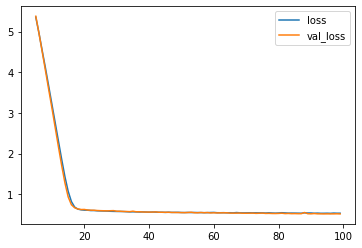

In [220]:
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[11])
])
model.compile(
    optimizer='adam',
    loss='mae'
)
history= model.fit(
    x= train_x,
    y= train_y,
    validation_data=(val_x,val_y),
    verbose=0,
    epochs=100
)
plotting(history)

### 11 input and 10 node architecture

Epochs : 100
Minimum loss: 0.5160794258117676
Minimum val_loss 0.48125243186950684


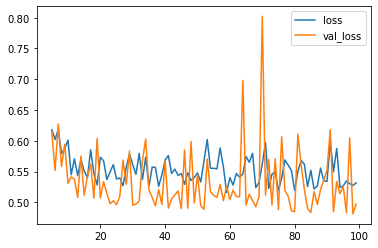

In [221]:
model= tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[11]),
    tf.keras.layers.Dense(6),
    tf.keras.layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae'
)
history= model.fit(
    x= train_x,
    y= train_y,
    validation_data=(val_x,val_y),
    verbose=0,
    epochs=100
)
plotting(history)

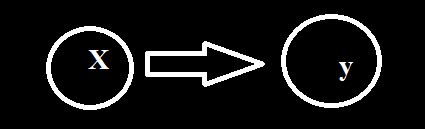

## $Weight*X+bias$
## $2*x +3$


In [262]:
x= np.random.uniform(10,size=1000)
y= 2*x + 3.3
train_x,val_x,train_y,val_y= train_test_split(x,y)

In [272]:
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])
model.compile(
    optimizer='adam',
    loss='mae'
)
history= model.fit(
    x=train_x,
    y=train_y,
    validation_data=(val_x,val_y),
    epochs=500,
    verbose=2
)

Epoch 1/500
24/24 - 1s - loss: 18.7923 - val_loss: 18.0514
Epoch 2/500
24/24 - 0s - loss: 18.6348 - val_loss: 17.8997
Epoch 3/500
24/24 - 0s - loss: 18.4780 - val_loss: 17.7480
Epoch 4/500
24/24 - 0s - loss: 18.3215 - val_loss: 17.5973
Epoch 5/500
24/24 - 0s - loss: 18.1647 - val_loss: 17.4459
Epoch 6/500
24/24 - 0s - loss: 18.0075 - val_loss: 17.2952
Epoch 7/500
24/24 - 0s - loss: 17.8511 - val_loss: 17.1432
Epoch 8/500
24/24 - 0s - loss: 17.6936 - val_loss: 16.9927
Epoch 9/500
24/24 - 0s - loss: 17.5371 - val_loss: 16.8411
Epoch 10/500
24/24 - 0s - loss: 17.3801 - val_loss: 16.6898
Epoch 11/500
24/24 - 0s - loss: 17.2235 - val_loss: 16.5386
Epoch 12/500
24/24 - 0s - loss: 17.0667 - val_loss: 16.3883
Epoch 13/500
24/24 - 0s - loss: 16.9099 - val_loss: 16.2368
Epoch 14/500
24/24 - 0s - loss: 16.7534 - val_loss: 16.0851
Epoch 15/500
24/24 - 0s - loss: 16.5962 - val_loss: 15.9344
Epoch 16/500
24/24 - 0s - loss: 16.4399 - val_loss: 15.7826
Epoch 17/500
24/24 - 0s - loss: 16.2825 - val_los

In [274]:
w,b= model.weights

In [281]:
print(np.round(w.numpy()).squeeze())

2.0


In [282]:
print(np.round(b.numpy()).squeeze())

3.0


## Dropout Layer

In [26]:
model= tf.keras.Sequential([
    tf.keras.layers.Dense(5,input_shape=[11]),
    tf.keras.layers.Dense(8,activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='SparseCategoricalCrossentropy'
)
history= model.fit(
    x= train_x,
    y= train_y,
    validation_data= (val_x,val_y),
    epochs=100,
    verbose=2
)

Epoch 1/100


InvalidArgumentError:  Received a label value of 8 which is outside the valid range of [0, 8).  Label values: 6 4 7 5 4 6 5 5 8 5 6 7 6 5 5 6 6 6 5 6 5 5 5 6 6 5 7 5 6 6 6 5
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-26-6680cc222ed9>:9) ]] [Op:__inference_train_function_22754]

Function call stack:
train_function


In [9]:
train_x.shape

(1199, 11)

In [27]:
train_y.value_counts()

5    504
6    483
7    150
4     39
8     14
3      9
Name: quality, dtype: int64

In [58]:
y_true = [[0., 1.], [0., 0.]]
y_pred = [[0.6, 0.4], [0.4, 0.6]]


tf.keras.losses.binary_crossentropy(y_true,y_pred).numpy()*100

array([91.62905, 71.3558 ], dtype=float32)

In [2]:
tf.__version__

'2.4.1'

In [13]:
rank_0= tf.constant(4)
print(rank_0)
rank_0.shape

tf.Tensor(4, shape=(), dtype=int32)


TensorShape([])

In [12]:
rank_1= tf.constant([1,2,3])
print(rank_1)
rank_1.shape

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


TensorShape([3])

In [15]:
rank_2= tf.constant([[1,2,3],[4,5,6],[7,8,9]])
print(rank_2)
rank_2.shape

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)


TensorShape([3, 3])

In [31]:
rank_3 = tf.constant(
[
  [
      [0, 1, 2, 3, 4],
      [5, 6, 7, 8, 9]
  ],
  [
    [10, 11, 12, 13, 14],
    [15, 16, 17, 18, 19]
  ],
  [
    [20, 21, 22, 23, 24],
    [25, 26, 27, 28, 29]
  ]
])


# 3 lists with each containing 2 lists and 4 elements in each list
print(rank_3)
rank_3.shape

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


TensorShape([3, 2, 5])

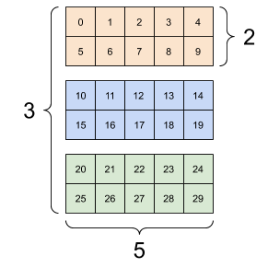

In [3]:
# [3,2,4,5]

rank_4 = tf.constant([
    [
        [
            [1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]
        ],
        [
            [1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]
        ]
    ],
    [
        [
            [1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]
        ],
        [
            [1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]
        ]
    ],
    [
        [
            [1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]
        ],
        [
            [1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]
        ]
    ]
])

In [36]:
rank_4.shape

TensorShape([3, 2, 4, 5])

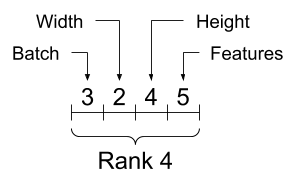

In [4]:
rank_4

<tf.Tensor: shape=(3, 2, 4, 5), dtype=int32, numpy=
array([[[[1, 2, 3, 4, 5],
         [1, 2, 3, 4, 5],
         [1, 2, 3, 4, 5],
         [1, 2, 3, 4, 5]],

        [[1, 2, 3, 4, 5],
         [1, 2, 3, 4, 5],
         [1, 2, 3, 4, 5],
         [1, 2, 3, 4, 5]]],


       [[[1, 2, 3, 4, 5],
         [1, 2, 3, 4, 5],
         [1, 2, 3, 4, 5],
         [1, 2, 3, 4, 5]],

        [[1, 2, 3, 4, 5],
         [1, 2, 3, 4, 5],
         [1, 2, 3, 4, 5],
         [1, 2, 3, 4, 5]]],


       [[[1, 2, 3, 4, 5],
         [1, 2, 3, 4, 5],
         [1, 2, 3, 4, 5],
         [1, 2, 3, 4, 5]],

        [[1, 2, 3, 4, 5],
         [1, 2, 3, 4, 5],
         [1, 2, 3, 4, 5],
         [1, 2, 3, 4, 5]]]])>

## Overfitting

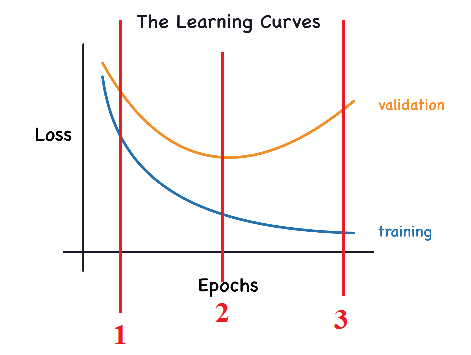

1: Training loss is high and Validation is high too <br> 
**Meaning**: Model cannot learn the training data hence Underfitting.<br>
**Sollution**: Add features, Increase neural networks fatness so that it can learn more.<br>

2: Sweet Spot !<br>
**Meaning** : Good spot to get predictions<br>
**get it by**: Early stopping<br>

3: Training loss is less and validation is high<br> 
**Meaning**: Model has learned everything about data hence Overfitting.<br>
**Sollution**: Dropout(shutting down random nodes in neural network), Reduce features so that model won't get enough info to learn everything about the data<br>

## Batch normalization

In [6]:
tf.keras.layers.BatchNormalization().input(data)

AttributeError: Layer batch_normalization_1 is not connected, no input to return.